# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Satria Adi Firmansyah
- **Email:** kakaklanglang@gmail.com
- **ID Dicoding:** sa_firmansyah9

## Menentukan Pertanyaan Bisnis

- Bagaimana perbedaan jumlah pengguna sepeda pada hari kerja dibanding hari libur?
- Bagaimana pengaruh musim terhadap jumlah pengguna sepeda?
- Bagaimana trend pengguna terdaftar tahun 2011 hingga 2012?


## Import Semua Packages/Library yang Digunakan

Sebelum melakukan analisis data, import terlebih dahulu library yang dibutuhkan.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Data Wrangling

### Gathering Data

 Data yang digunakan pada proyek merupakan data open-source yang tersedia di [kaggle](https://www.kaggle.com/datasets/lakshmi25npathi/bike-sharing-dataset). Data tersebut kemudian diupload ke google drive pribadi. Data yang digunakan merupakan data penggunaan sepeda bike sharing yang terdiri dari data **day.csv** dan **hour.csv**.

In [ ]:
# Memuat tabel day

df_day = pd.read_csv('/content/drive/MyDrive/day.csv')

# Menampilkan 5 baris pertama tabel day
df_day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [ ]:
# Memuat tabel hour
df_hour = pd.read_csv('/content/drive/MyDrive/hour.csv')

# Menampilkan 5 baris pertama tabel hour
df_hour.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### Assessing Data

#### Asesmen Data df_day

1. Periksa tipe data dari tiap kolom

In [ ]:
df_day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


Tipe data dteday keliru, seharusnya adalah ```datetime```



2. Periksa missing value.

In [ ]:
df_day.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0


Tidak ada missing value.

3. Periksa duplikasi data.

In [ ]:
print("Jumlah duplikasi: ", df_day.duplicated().sum())

Jumlah duplikasi:  0


4. Periksa parameter statistik

In [ ]:
df_day.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


Tidak ada keanehan pada setiap nilai parameter statistik.

#### Asesmen data df_hour

1. Memeriksa tipe data dari setiap kolom

In [ ]:
df_hour.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


Tipe data dteday keliru, seharusnya adalah ```datetime```

2. Periksa missing value.

In [ ]:
df_hour.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
hr,0
holiday,0
weekday,0
workingday,0
weathersit,0


Tidak ada missing value.

3. Periksa duplikasi

In [ ]:
print("Jumlah duplikasi: ", df_hour.duplicated().sum())

Jumlah duplikasi:  0


4. Periksa parameter statistik.

In [ ]:
df_hour.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


Tidak ada keanehan pada setiap nilai parameter statistik.

### Cleaning Data

1. Menghapus kolom yang tidak diperlukan.

Kolom `instant` pada data tidak diperlukan untuk analisis data, sehingga kolom ini dapat dihapus.

In [ ]:
df_day.drop(labels='instant', axis=1, inplace=True)
df_hour.drop(labels='instant', axis=1, inplace=True)

2. Mengubah tipe data dteday dari `object` menjadi `datetime`, dan workingday dari `int` menjadi `boolean`

In [ ]:
# Mengubah tipe data dteday
df_day['dteday'] = pd.to_datetime(df_day['dteday'])
df_hour['dteday'] = pd.to_datetime(df_hour['dteday'])

# Mengubah tipe data workingday
df_day['workingday'] = df_day['workingday'].astype('bool')
df_hour['workingday'] = df_hour['workingday'].astype('bool')

# Memeriksa tipe data
df_day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   dteday      731 non-null    datetime64[ns]
 1   season      731 non-null    int64         
 2   yr          731 non-null    int64         
 3   mnth        731 non-null    int64         
 4   holiday     731 non-null    int64         
 5   weekday     731 non-null    int64         
 6   workingday  731 non-null    bool          
 7   weathersit  731 non-null    int64         
 8   temp        731 non-null    float64       
 9   atemp       731 non-null    float64       
 10  hum         731 non-null    float64       
 11  windspeed   731 non-null    float64       
 12  casual      731 non-null    int64         
 13  registered  731 non-null    int64         
 14  cnt         731 non-null    int64         
dtypes: bool(1), datetime64[ns](1), float64(4), int64(9)
memory usage: 80.8 KB


Tipe data **dteday** sudah berubah menjadi `datetime`, dan **workingday** menjadi `bool`

3. Mengubah detail tabel.

Ubah beberapa nama judul kolom yang diperlukan agar mudah lebih mudah dibaca

In [ ]:
# Mengubah beberapa nama judul kolom
df_day.rename(columns={
    'dteday' : 'dateday',
    'yr' : 'year',
    'mnth' : 'month',
    'hum' : 'humidity',
    'cnt' : 'count'
}, inplace=True)

df_hour.rename(columns={
    'dteday' : 'dateday',
    'yr' : 'year',
    'mnth' : 'month',
    'hr' : 'hour',
    'hum' : 'humidity',
    'cnt' : 'count'
}, inplace=True)

df_hour.head()

,dateday,season,year,month,hour,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01,1,0,1,0,0,6,False,1,0.24,0.2879,0.81,0.0,3,13,16
1,2011-01-01,1,0,1,1,0,6,False,1,0.22,0.2727,0.80,0.0,8,32,40
2,2011-01-01,1,0,1,2,0,6,False,1,0.22,0.2727,0.80,0.0,5,27,32
3,2011-01-01,1,0,1,3,0,6,False,1,0.24,0.2879,0.75,0.0,3,10,13
4,2011-01-01,1,0,1,4,0,6,False,1,0.24,0.2879,0.75,0.0,0,1,1


Selanjutnya, ubah nilai pada kolom year, month, dan lainnya yang diperlukan menjadi nama yang dapat dipahami, ubah nilai workingday menjadi yes/no

In [ ]:
# Mengubah nilai pada kolom season menjadi nama season
season_mapping = {1: 'Winter', 2: 'Spring', 3: 'Summer', 4: 'Autumn'}
#df_day.season.replace((1,2,3,4), ('Winter', 'Spring', 'Summer', 'Autumn'), inplace=True)
df_day.replace({'season': season_mapping}, inplace=True)
df_hour.replace({'season': season_mapping}, inplace=True)

# Mengubah nilai variabel year
df_day['year'] = df_day['dateday'].dt.year
df_hour['year'] = df_hour['dateday'].dt.year

# Mengubah nilai pada kolom month menjadi nama bulan
df_day['month'] = df_day['dateday'].dt.month_name()
df_hour['month'] = df_hour['dateday'].dt.month_name()

# Mengubah nilai pada kolom weekday menjadi nama hari
df_day['weekday'] = df_day['dateday'].dt.day_name()
df_hour['weekday'] = df_hour['dateday'].dt.day_name()

# Mengubah nilai pada kolom weathersit menjadi keterangan cuaca
weathersit_mapping = {1: 'Clear & Clouds', 2: 'Mist & Clouds', 3: 'Light snow/rain', 4: 'Heavy snow/rain, hail'}
df_day.replace({'weathersit': weathersit_mapping}, inplace=True)
'''df_day.weathersit.replace(
    (1,2,3,4),
    ('Clear & Clouds', 'Mist & Clouds', 'Light snow/rain', 'Heavy snow/rain, hail'),
    inplace=True
)
'''
df_hour.replace({'weathersit': weathersit_mapping}, inplace=True)
'''df_hour.weathersit.replace(
    (1,2,3,4),
    ('Clear & Clouds', 'Mist & Clouds', 'Light snow/rain', 'Heavy snow/rain, hail'),
    inplace=True
)
'''
# Mengubah nilai pada kolom workingday menjadi Yes/No
workingday_mapping = {True: 'Yes', False: 'No'}
df_day.replace({'workingday': workingday_mapping}, inplace=True)
df_hour.replace({'workingday': workingday_mapping}, inplace=True)
'''df_day.workingday.replace(
    (True, False),
    ('Yes', 'No'),
    inplace=True
)

df_hour.workingday.replace(
    (True, False),
    ('Yes', 'No'),
    inplace=True
)
'''
df_hour.head()

,dateday,season,year,month,hour,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01,Winter,2011,January,0,0,Saturday,No,Clear & Clouds,0.24,0.2879,0.81,0.0,3,13,16
1,2011-01-01,Winter,2011,January,1,0,Saturday,No,Clear & Clouds,0.22,0.2727,0.80,0.0,8,32,40
2,2011-01-01,Winter,2011,January,2,0,Saturday,No,Clear & Clouds,0.22,0.2727,0.80,0.0,5,27,32
3,2011-01-01,Winter,2011,January,3,0,Saturday,No,Clear & Clouds,0.24,0.2879,0.75,0.0,3,10,13
4,2011-01-01,Winter,2011,January,4,0,Saturday,No,Clear & Clouds,0.24,0.2879,0.75,0.0,0,1,1


4. Menggabungkan dua dataframe menjadi satu dataframe.

In [ ]:
all_df = df_hour.merge(df_day, on='dateday', how='inner', suffixes=('_hour', '_day'))
all_df.head()

,dateday,season_hour,year_hour,month_hour,hour,holiday_hour,weekday_hour,workingday_hour,weathersit_hour,temp_hour,...,weekday_day,workingday_day,weathersit_day,temp_day,atemp_day,humidity_day,windspeed_day,casual_day,registered_day,count_day
0,2011-01-01,Winter,2011,January,0,0,Saturday,No,Clear & Clouds,0.24,...,Saturday,No,Mist & Clouds,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2011-01-01,Winter,2011,January,1,0,Saturday,No,Clear & Clouds,0.22,...,Saturday,No,Mist & Clouds,0.344167,0.363625,0.805833,0.160446,331,654,985
2,2011-01-01,Winter,2011,January,2,0,Saturday,No,Clear & Clouds,0.22,...,Saturday,No,Mist & Clouds,0.344167,0.363625,0.805833,0.160446,331,654,985
3,2011-01-01,Winter,2011,January,3,0,Saturday,No,Clear & Clouds,0.24,...,Saturday,No,Mist & Clouds,0.344167,0.363625,0.805833,0.160446,331,654,985
4,2011-01-01,Winter,2011,January,4,0,Saturday,No,Clear & Clouds,0.24,...,Saturday,No,Mist & Clouds,0.344167,0.363625,0.805833,0.160446,331,654,985


Menyimpan hasil cleaning data.

In [ ]:
df_hour.to_csv("data.csv", index=False)

## Exploratory Data Analysis (EDA)

### Explore ...

Dalam melakukan EDA, data yang digunakan adalah `df_hour` karena data tersebut memiliki keterangan cuaca lebih rinci pada setiap jam.

Casual User:  620017
Registered User:  2672662
Total User:  3292679


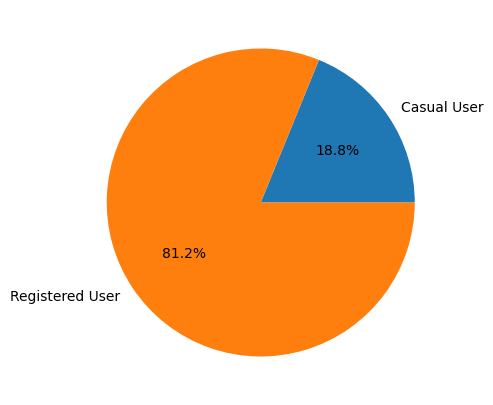

In [ ]:
casual_user = df_hour['casual'].sum()
registered_user = df_hour['registered'].sum()
print("Casual User: ", casual_user)
print("Registered User: ", registered_user)
print("Total User: ", casual_user + registered_user)

plt.figure(figsize=(10,5))
plt.pie(x=[casual_user, registered_user], labels=['Casual User', 'Registered User'], autopct='%1.1f%%')
plt.show()

Dari informasi tersebut, pengguna terdaftar (registered user) masih jauh lebih dominan dibandingkan dengan pengguna tidak terdaftar (casual user).

#### Analisis pengguna berdasarkan musim

In [ ]:
df_hour.groupby(by='season').agg({
    "casual": "sum",
    "registered": "sum",
    "count": "sum"
})

,casual,registered,count
season,,,
Autumn,129782,711831,841613
Spring,203522,715067,918589
Summer,226091,835038,1061129
Winter,60622,410726,471348


<Axes: xlabel='season', ylabel='count'>

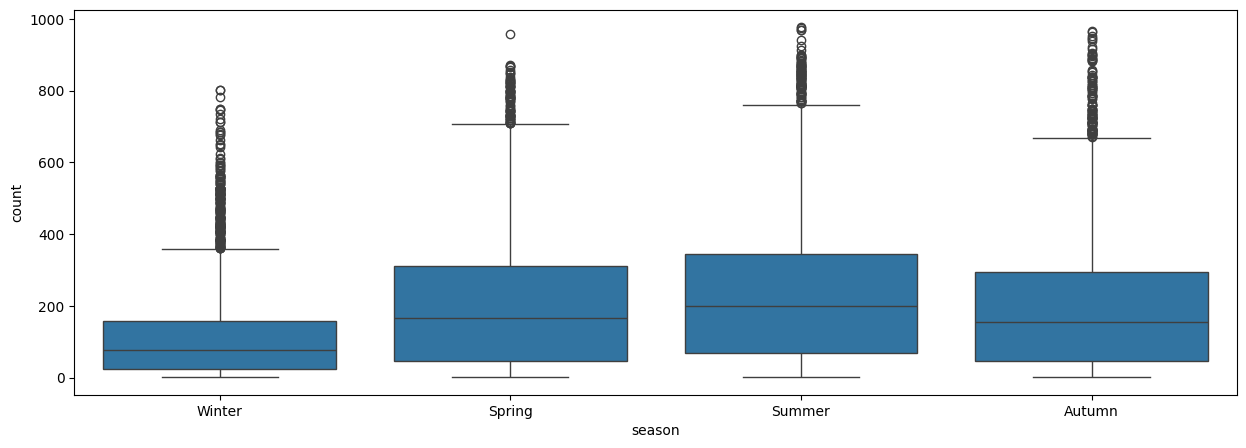

In [ ]:
plt.figure(figsize=(15,5))
sns.boxplot(
    x='season',
    y='count',
    data=df_hour
)

<Axes: xlabel='season'>

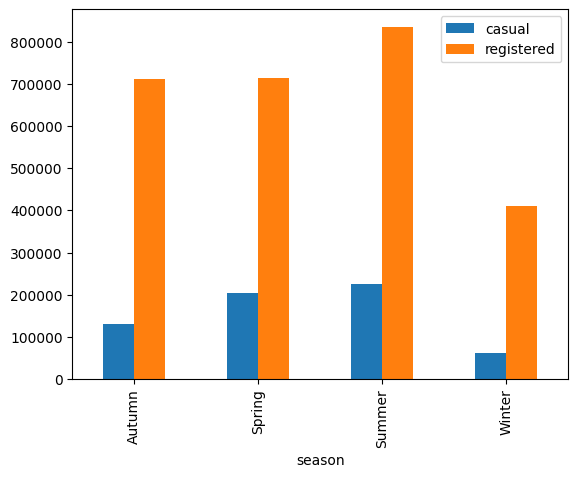

In [ ]:
season_analysis = df_hour.iloc[:,[1,13,14]]
season_analysis_result = season_analysis.groupby(by='season').sum()
season_analysis_result.plot.bar()

Jumlah pengguna tertinggi terjadi pada musim panas dan terendah pada musim dingin. Pada chart diatas juga terlihat bahwa peningkatan/penurunan pada jumlah registered user diikuti oleh jumlah peningkatan/penurunan casual user.

#### Analisis pengguna berdasarkan tahun

In [ ]:
df_hour.groupby(by='year').agg({
    "casual": "sum",
    "registered": "sum",
    "count": "sum"
})

,casual,registered,count
year,,,
2011,247252,995851,1243103
2012,372765,1676811,2049576


<Axes: xlabel='year', ylabel='count'>

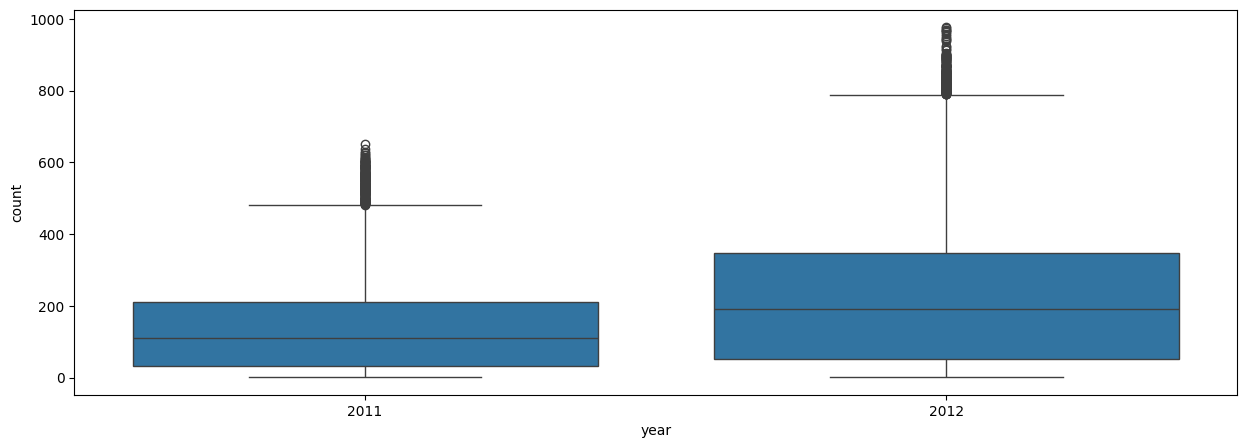

In [ ]:
plt.figure(figsize=(15,5))
sns.boxplot(
    x='year',
    y='count',
    data=df_hour
)

<Axes: xlabel='year'>

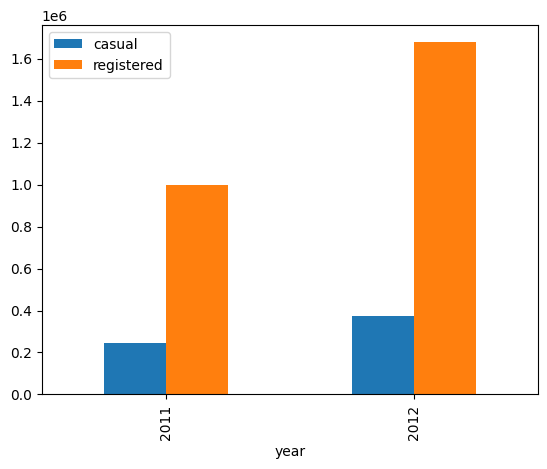

In [ ]:
year_analysis = df_hour.iloc[:,[2,13,14]]
year_analysis_result = year_analysis.groupby(by='year').sum()
year_analysis_result.plot.bar()

Jumlah pengguna keseluruhan pada tahun 2012 mengalami kenaikan yang signifikan dibandingkan dengan tahun 2011.

#### Analisis pengguna berdasarkan bulan

In [ ]:
df_hour.groupby(by='month').agg({
    "casual": "sum",
    "registered": "sum",
    "count": "sum"
})

,casual,registered,count
month,,,
April,60802,208292,269094
August,72039,279155,351194
December,21693,189343,211036
February,14963,136389,151352
January,12042,122891,134933
July,78157,266791,344948
June,73906,272436,346342
March,44444,184476,228920
May,75285,256401,331686


<Axes: xlabel='month', ylabel='count'>

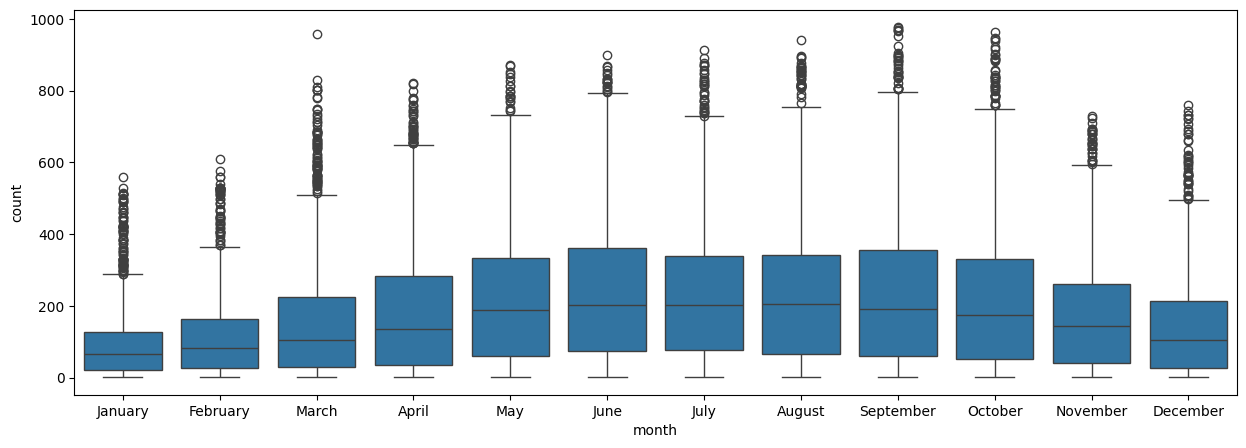

In [ ]:
plt.figure(figsize=(15,5))
sns.boxplot(
    x='month',
    y='count',
    data=df_hour
)

Pada rentang bulan Mei - Oktober, jumlah pengguna sepeda tinggi. Jumlah pengguna sepada rendah terjadi pada bulan Januari - Februari.

#### Analisis pengguna berdasarkan hari kerja/libur

In [ ]:
df_hour.groupby(by='workingday').agg({
    "casual": "sum",
    "registered": "sum",
    "count": "sum"
})

,casual,registered,count
workingday,,,
No,316732,683537,1000269
Yes,303285,1989125,2292410


<Axes: xlabel='workingday', ylabel='count'>

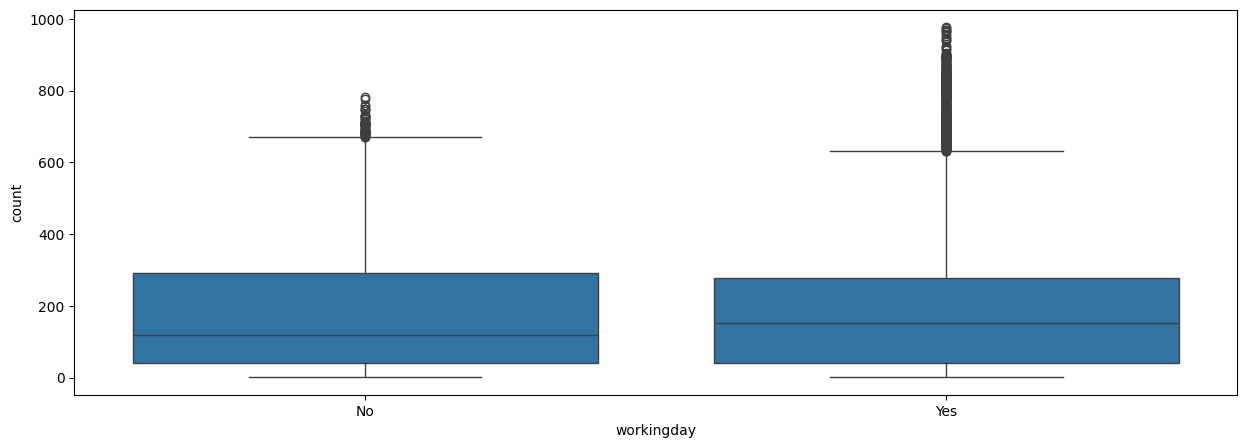

In [ ]:
plt.figure(figsize=(15,5))
sns.boxplot(
    x='workingday',
    y='count',
    data=df_hour
)

<Axes: xlabel='workingday'>

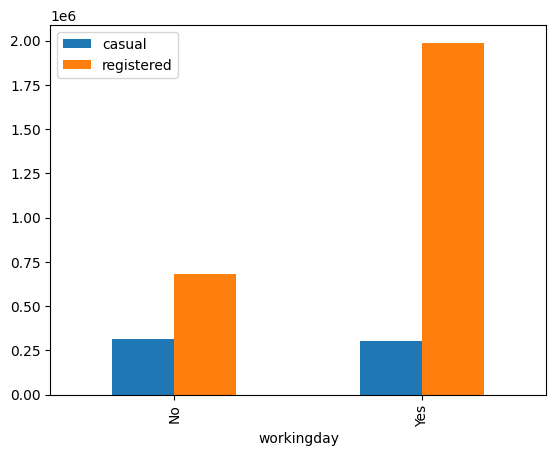

In [ ]:
workingday_analysis = df_hour.iloc[:,[7,13,14]]
workingday_analysis_result = workingday_analysis.groupby(by='workingday').sum()
workingday_analysis_result.plot.bar()

Pengguna casual di hari kerja dibanding non-kerja relatif sama, namun pengguna registered di hari kerja lebih dari 2x lipatnya dibanding hari non-kerja

#### Korelasi

<Axes: >

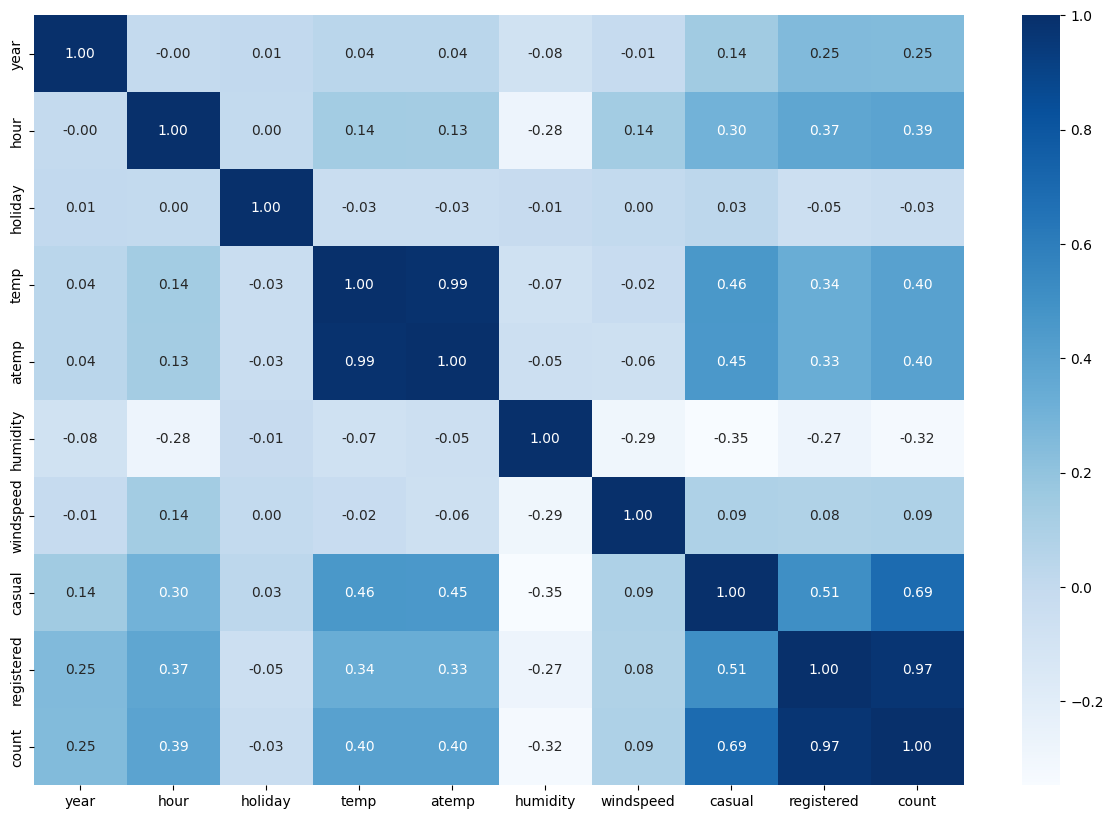

In [ ]:
plt.figure(figsize=(15, 10))
sns.heatmap(df_hour.select_dtypes(include=np.number).corr(), annot=True, cmap="Blues", fmt=".2f")

- Terdapat korelasi yang sangat kuat antara `registered` dengan `count` serta `atemp` dengan `temp`.
- Terdapat korelasi yang kuat antara `casual` dengan `count`.
- Terdapat korelasi yang moderat antara `casual` dengan `temp` dan `atemp`.


## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana perbedaan jumlah pengguna sepeda pada hari kerja dibanding hari libur?

In [ ]:
workingday_analysis = df_hour.iloc[:,[7,15]]
workingday_result = workingday_analysis.groupby(by='workingday').sum().reset_index().sort_values('count', ascending=False)
workingday_result

,workingday,count
1,Yes,2292410
0,No,1000269


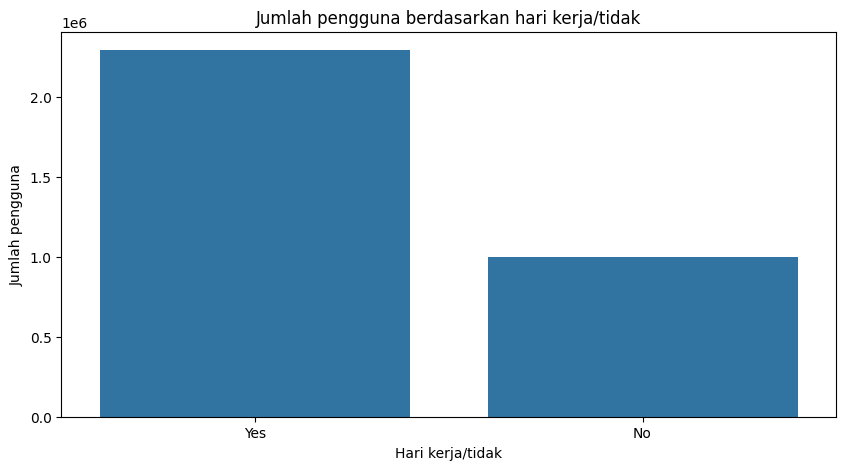

In [ ]:
plt.figure(figsize=(10,5))
sns.barplot(x='workingday', y='count', data=workingday_result)
plt.title("Jumlah pengguna berdasarkan hari kerja/tidak")
plt.xlabel("Hari kerja/tidak")
plt.ylabel("Jumlah pengguna")
plt.show()

Hari kerja/tidak sangat berpengaruh terhadap penggunaan sepeda. Pada hari kerja, penggunaan sepeda secara keseluruhan mencapai 2x lipat dibanding hari libur

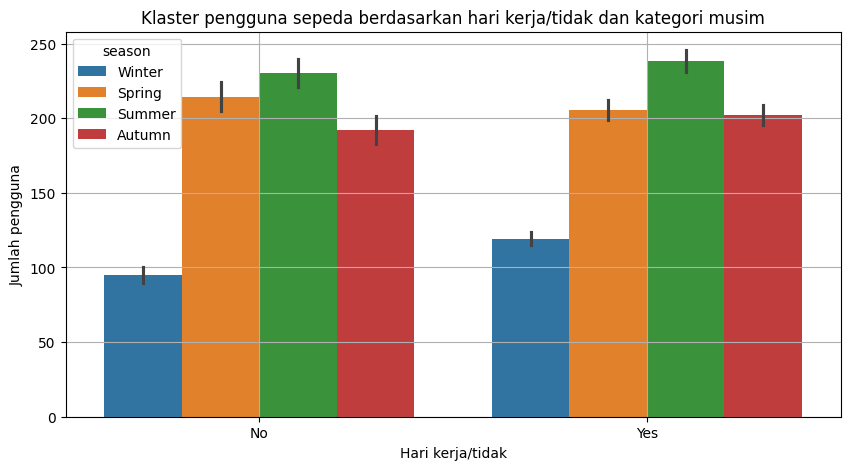

In [ ]:
plt.figure(figsize=(10,5))
sns.barplot(x='workingday', y='count', data=df_hour, hue='season')
plt.title("Klaster pengguna sepeda berdasarkan hari kerja/tidak dan kategori musim")
plt.xlabel("Hari kerja/tidak")
plt.ylabel("Jumlah pengguna")
plt.grid()
plt.show()

Pada klasterisasi diatas, jumlah pengguna sepeda mengalami peningkatan pada hari kerja, apapun musimnya. Kecuali pada musim semi, dimana pengguna sepeda pada hari libur justru lebih tinggi dibanding pengguna sepeda pada hari kerja.

### Pertanyaan 2: Bagaimana pengaruh jenis musim terhadap jumlah pengguna sepeda?

Untuk menjawab pertanyaan 2, lihat terlebih dahulu statistik jumlah pengguna sepada untuk setiap musim.

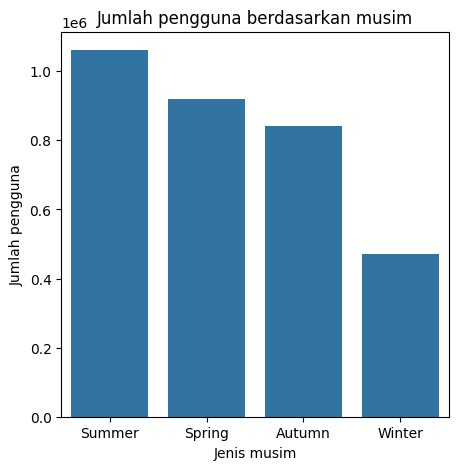

In [ ]:
season_analysis = df_hour.iloc[:,[1,15]]
season_result = season_analysis.groupby(by='season').sum().reset_index().sort_values('count', ascending=False)

plt.figure(figsize=(5,5))
sns.barplot(x='season', y='count', data=season_result)
plt.title("Jumlah pengguna berdasarkan musim")
plt.xlabel("Jenis musim")
plt.ylabel("Jumlah pengguna")
plt.show()

Menurut chart diatas, jenis musim berpengaruh terhadap jumlah pengguna sepeda. Jumlah pengguna sepeda tertinggi terjadi pada musim panas dan terendah pada musim dingin. Hasil ini mengindikasikan pula adanya penurunan pengguna seiring menurunnya suhu

Untuk mendapatkan hasil analisis yang lebih baik, lakukan analisis lanjutan dengan menggunakan klasterisasi berdasarkan temperatur dan musim.

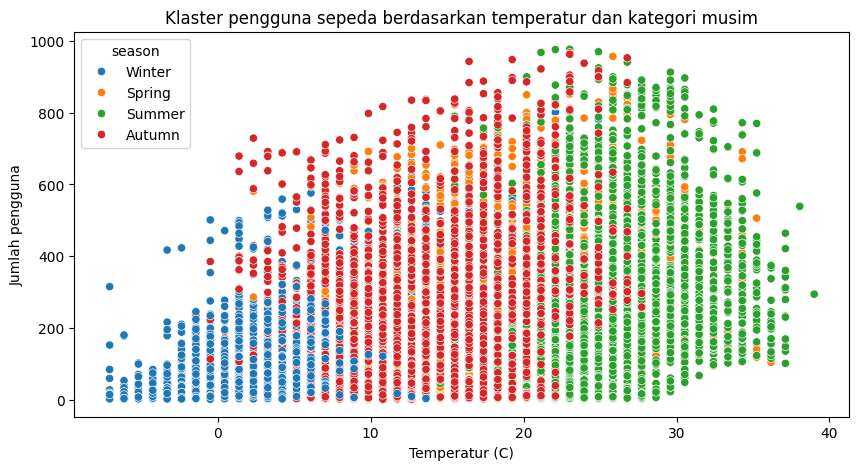

In [ ]:
plt.figure(figsize=(10,5))
sns.scatterplot(x='temp', y='count', data=df_hour, hue='season')
plt.title("Klaster pengguna sepeda berdasarkan temperatur dan kategori musim")
plt.xlabel("Temperatur (C)")
plt.ylabel("Jumlah pengguna")
plt.show()

Hasil di atas menandakan bahwa dengan menurunnya suhu di musim dingin, menurun pula jumlah pengguna sepeda. Namun seiring suhu naik di musim yang lebih panas, jumlah pengguna sepeda juga meningkat

### Pertanyaan 3: Bagaimana trend penggunaan sepeda tahun 2011 dan 2012?

<ipython-input-62-8968490e04ec>:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_registered = df_hour.resample(rule='M', on='dateday').agg({
<ipython-input-62-8968490e04ec>:4: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_casual = df_hour.resample(rule='M', on='dateday').agg({


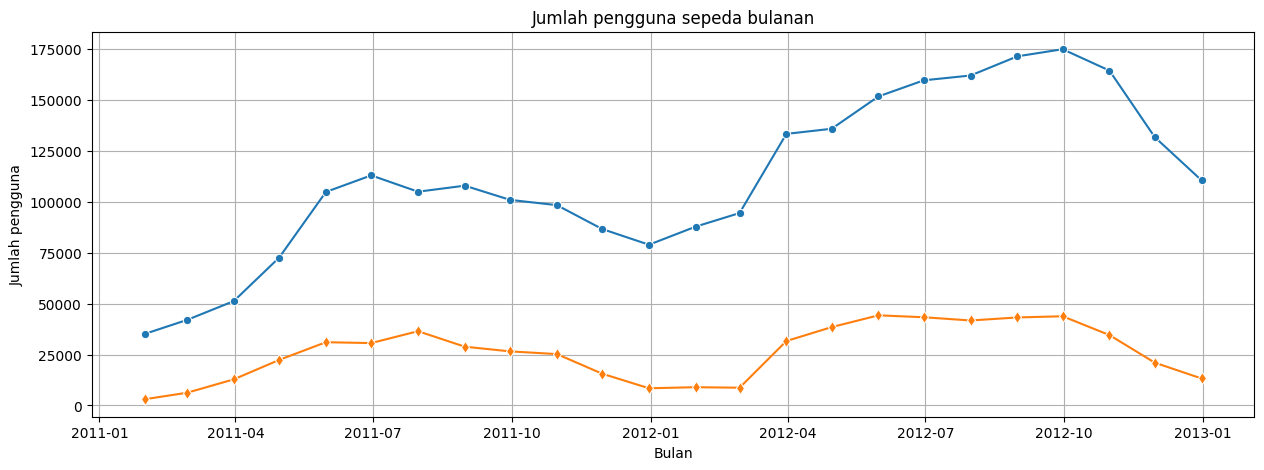

In [ ]:
monthly_registered = df_hour.resample(rule='M', on='dateday').agg({
    "registered": "sum"
})
monthly_casual = df_hour.resample(rule='M', on='dateday').agg({
    "casual": "sum"
})

plt.figure(figsize=(15,5))
sns.lineplot(
    data=monthly_registered,
    x="dateday",
    y="registered",
    marker="o")
sns.lineplot(
    data=monthly_casual,
    x="dateday",
    y="casual",
    marker="d")
plt.title("Jumlah pengguna sepeda bulanan")
plt.xlabel("Bulan")
plt.ylabel("Jumlah pengguna")
plt.grid()
plt.show()

Tren pengguna sepeda cenderung meningkat pada bulan Maret dan menurun pada bulan November. Tren pengguna paling ramai, terjadi pada rentang bulan Mei-Oktober.
Kenaikan pengguna registered cenderung lebih drastis dibandingkan pengguna casual. Peningkatan pengguna registered secara keseluruhan dari Januari 2011 hingga Desember 2012 juga lebih signifikan dibanding pengguna casual yang cenderung stagnan.

## Conclusion

- Conclusion pertanyaan 1:
  - Hari kerja/tidak sangat mempengaruhi jumlah pengguna sepeda, dimana jumlah pengguna pada hari kerja bisa mencapai 2x lipatnya pada hari libur. Kemudian, pada hari kerja di musim panas, semi, dan salju, pengguna sepeda juga meningkat dibanding pada hari libur. Kecuali pada musim gugur, dimana pengguna sepeda pada hari libur justru lebih tinggi dibanding pada hari kerja.
- Conclution pertanyaan 2:
  - Jenis musim sangat berpengaruh terhadap jumlah penggunaan sepeda. Pada musim panas, jumlah penggunaan sepeda paling tinggi dikarenakan pada musim tersebut temperatur udara berada di rentang 20-36 derajat celcius yang relatif hangat. Pada musim dingin, jumlah penggunaan sepeda paling rendah dikarenakan pada musim tersebut temperatur udara sangat dingin, bahkan ekstrim di rentang -8 sampai 10 derajat celcius.
- Conclution pertanyaan 3:
  - Tren penggunaan sepeda oleh registered user dari tahun 2011 hingga 2012 mengalami peningkatan yang cukup signifikan. Dibandingkan dengan penggunaan sepeda oleh casual user yang cenderung stagnan dari tahun 2011 hingga 2012. Namun, momen peningkatan dan penurunan akibat pergantian musim bagi kedua kategori user cenderung sama, meskipun peningkatan di tiap pergantian musim oleh registered user cenderung lebih drastis dibanding oleh casual user.